In [1]:
from __future__ import division
import os
from IPython.display import display, Math, Latex
import math
from math import sqrt, cos, sin, pi
import numpy as np
import statsmodels.api as sm
from scipy.interpolate import interp1d
import scipy.integrate
import matplotlib.pyplot as plt
import matplotlib.mlab as ml
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
import healpy as hp
#import plot_mpI2
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
from scipy.stats import norm
import matplotlib.mlab as mlab


%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [3]:
# physical constants for natural units c = G = 1
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt

In [4]:
def hist_weight(lst):
    return np.ones_like(lst)/len(lst)

def auto_bin(bin_size, min_edge, max_edge):
    # for nice looking bins
    N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
    bin_list = np.linspace(min_edge, max_edge, Nplus1)
    return bin_list

In [5]:
places = ["../../rusty_data/KH13_Stalled/29_dex/", \
          "../../../rusty_data/KH13_Stalled/435_dex/", \
          "../../rusty_data/KH13_Stalled/58_dex/", \
         "../../rusty_data/KH13_Stalled/87_dex/", \
         "../../rusty_data/MM13_Stalled/34_dex/", \
         "../../rusty_data/MM13_Stalled/51_dex/", \
         "../../rusty_data/MM13_Stalled/68_dex/", \
         "../../rusty_data/MM13_Stalled/102_dex/", \
         "../../rusty_data/HR04_Stalled/30_dex/"]

In [6]:
stall_Mc_1 = []
stall_Mbul_1 = []
temp_file = []
for i in os.listdir("../../rusty_data/KH13_Stalled/29_dex/"):
    if i.endswith('.txt'):
        temp_file.append(i)
            
for jj in range(len(temp_file)):
    filename = temp_file[jj]

    sim_sky = np.genfromtxt("../../rusty_data/KH13_Stalled/29_dex/" + str(filename))
    if (len(sim_sky) != 21):
        stall_Mc_1 = np.hstack((stall_Mc_1 , (sim_sky[:,4])))
        stall_Mbul_1 = np.hstack((stall_Mbul_1 ,(sim_sky[:,20])))
    else:
        stall_Mc_1 = np.hstack((stall_Mc_1 , (sim_sky[4])))
        stall_Mbul_1 = np.hstack((stall_Mbul_1 ,(sim_sky[20])))

In [ ]:
"""stall_Mc_2 = []
stall_Mbul_2 = []
temp_file = []
for i in os.listdir("../../../rusty_data/KH13_Stalled/435_dex/"):
    if i.endswith('.txt'):
        temp_file.append(i)
            
for jj in range(len(temp_file)):
    filename = temp_file[jj]

    sim_sky = np.genfromtxt("../../../rusty_data/KH13_Stalled/435_dex/" + str(filename))
    if (len(sim_sky) != 21):
        stall_Mc_2.append(sim_sky[:,5])
        stall_Mbul_2.append(sim_sky[:,20])
    else:
        stall_Mc_2.append(sim_sky[5])
        stall_Mbul_2.append(sim_sky[20])"""

In [7]:
stall_Mc_3 = []
stall_Mbul_3 = []
temp_file = []
for i in os.listdir("../../rusty_data/MM13_Stalled/34_dex/"):
    if i.endswith('.txt'):
        temp_file.append(i)
            
for jj in range(len(temp_file)):
    filename = temp_file[jj]

    sim_sky = np.genfromtxt("../../rusty_data/MM13_Stalled/34_dex/" + str(filename))
    if (len(sim_sky) != 21):
        stall_Mc_3 = np.hstack((stall_Mc_3, (sim_sky[:,4])))
        stall_Mbul_3 = np.hstack((stall_Mbul_3, (sim_sky[:,20])))
    else:
        stall_Mc_3 = np.hstack((stall_Mc_3, (sim_sky[4])))
        stall_Mbul_3 = np.hstack((stall_Mbul_3, (sim_sky[20])))

In [8]:
stall_Mc_4 = []
stall_Mbul_4 = []
temp_file = []
for i in os.listdir("../../rusty_data/HR04_Stalled/30_dex/"):
    if i.endswith('.txt'):
        temp_file.append(i)
            
for jj in range(len(temp_file)):
    filename = temp_file[jj]

    sim_sky = np.genfromtxt("../../rusty_data/HR04_Stalled/30_dex/" + str(filename))
    if (len(sim_sky) != 21):
        stall_Mc_4 = np.hstack((stall_Mc_4, (sim_sky[:,4])))
        stall_Mbul_4 = np.hstack((stall_Mbul_4, (sim_sky[:,20])))
    else:
        stall_Mc_4 = np.hstack((stall_Mc_4, (sim_sky[4])))
        stall_Mbul_4 = np.hstack((stall_Mbul_4, (sim_sky[20])))

In [9]:
m_1 = np.log10(stall_Mbul_1)
m_3 = np.log10(stall_Mbul_3)
m_4 = np.log10(stall_Mbul_4)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
c_1 = np.log10(stall_Mc_1)
c_3 = np.log10(stall_Mc_3)
c_4 = np.log10(stall_Mc_4)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
len(m_4)

2702133

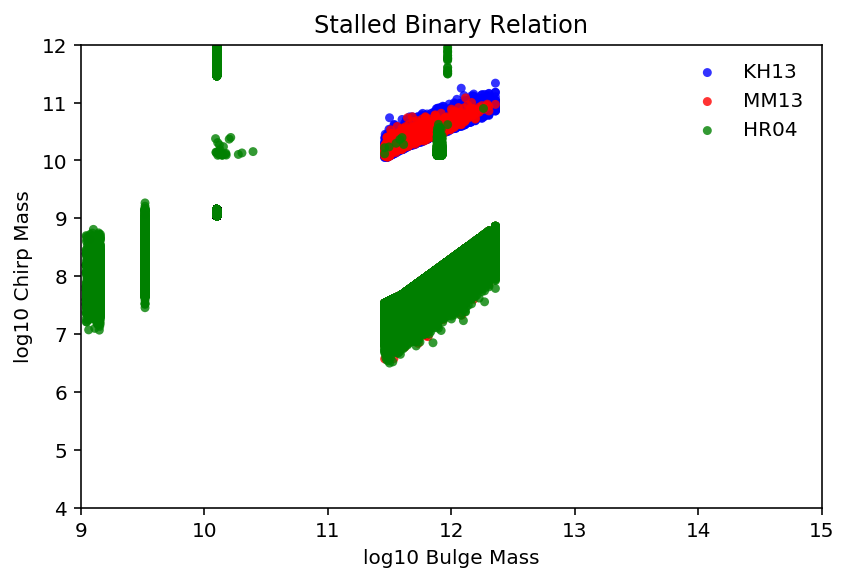

In [14]:
plt.scatter(m_1, c_1, edgecolors='none', color='blue', alpha=0.8, s=20, rasterized=True, label = "KH13") #skies
plt.scatter(m_3, c_3, edgecolors='none', color='red', alpha=0.8, s=20, rasterized=True, label = "MM13") #skies
plt.scatter(m_4, c_4, edgecolors='none', color='green', alpha=0.8, s=20, rasterized=True, label = "HR04") #skies


plt.xlabel("log10 Bulge Mass")
plt.ylabel("log10 Chirp Mass")
plt.xlim(9, 15)
plt.ylim(4, 12)
plt.tight_layout() 
plt.title("Stalled Binary Relation")
plt.legend(frameon=False)
#plt.savefig("plots_stalled/relation_chirp_bul_01")




In [ ]:
print(len(c_3))

bin_list = auto_bin(.07,8.3,10.3)
w_1 = hist_weight(c_1)
w_3 = hist_weight(c_3)
w_4 = hist_weight(c_4)

plt.hist(c_1 ,bin_list, align='left',  alpha=0.8, edgecolor = 'black', weights = w_1, label = "KH13")
plt.hist(c_3 ,bin_list, align='left',  alpha=0.8, edgecolor = 'black', weights = w_3, label = "MM13")
plt.hist(c_4 ,bin_list, align='left',  alpha=0.8, edgecolor = 'black', weights = w_4, label = "HR04")

ax.legend(frameon=False)


plt.xlabel(r"Log Chirp Mass $\mathcal{M}_c$ $[M_\odot]$, 25 year data")
plt.ylabel("Probability")
#plt.legend(frameon=False)
plt.tight_layout()
#plt.savefig("plots_stalled/chirp_dist.pdf")




In [ ]:
"""time scales histogram
- stellar hardening
- dynamical friction
- why those numbes are so big for m87"""